# Imports 

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import env
import prepare as p 
import warnings
warnings.filterwarnings('ignore')

Enter the name of the database:  zillow


In [3]:
df = p.wrangle_zillow()

In [4]:
df = p.add_county_state(df)

In [5]:
train, validate, test = p.split(df)

In [6]:
single_family_homes = ['Single Family Residential', 'Townhouse','Mobile Home']

In [7]:
log_error = train.logerror

In [8]:
train.drop(columns='Unnamed: 0', inplace=True)

## Lets look at log error a more in detail:

In [19]:
log_error.describe()

count    42895.000000
mean         0.016198
std          0.171232
min         -4.655420
25%         -0.024584
50%          0.006570
75%          0.039160
max          5.262999
Name: logerror, dtype: float64

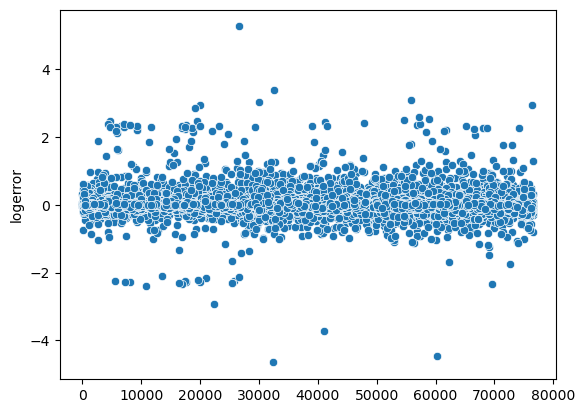

In [9]:
sns.scatterplot(log_error)
plt.show()

In [10]:
df = pd.get_dummies(df, columns=['propertylandusedesc'], drop_first=True)

# 5 Questions about the data, keeping in mind that your target variable is logerror. 

# Is there a relationship between counties and log error?

<Axes: xlabel='county_state', ylabel='logerror'>

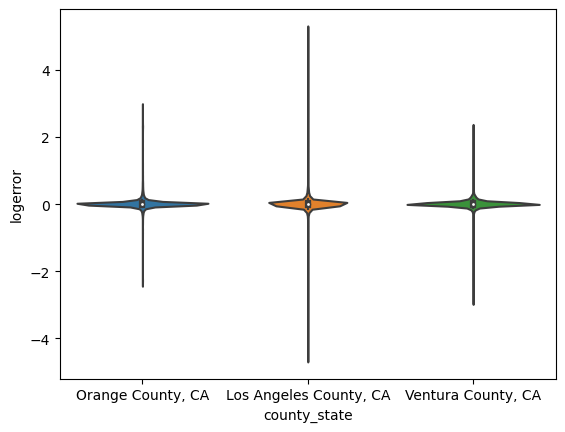

In [35]:
sns.violinplot(data=train, x='county_state', y= 'logerror')
plt.show()

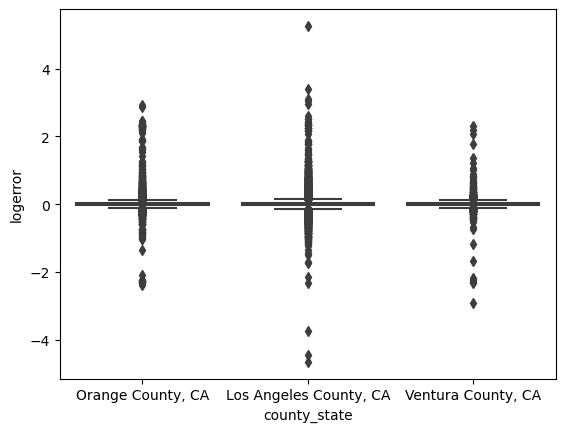

In [36]:
sns.boxplot(data=train, x='county_state', y= 'logerror')
plt.show()

# Is there a relationship between caluculated finished square feet and log error'

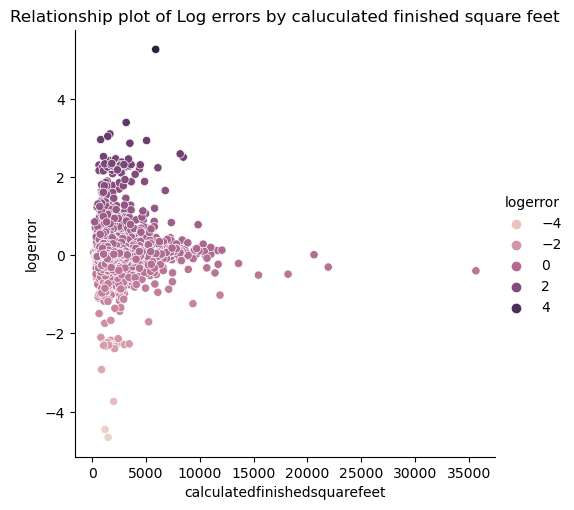

In [15]:
sns.relplot(x='calculatedfinishedsquarefeet', y='logerror',
               data=train, hue='logerror')
plt.title('Relationship plot of Log errors by caluculated finished square feet')
plt.show()